# Topic 36: Recommendation Systems

- 06/10/21
- onl01-dtsc-ft-022221

## Objectives

You will be able to:

* Demonstrate an understanding on how recommendation systems are being used for personalization of online services/products
* Parse and filter datasets into Spark DataFrame, performing basic feature selection
* Run a brief hyper-parameter selection activity through a scalable grid search
* Train and evaluate the predictive performance of recommendation system
* Generate predictions from the trained model

## Questions?

## Resources 

#### YouTube Playlist - From Me
- [Recommendation System and Matrix Decomposition](https://youtube.com/playlist?list=PLFknVelSJiSwIUW2JTg7mK_EdNUH7dnk_)


#### Study Group Recordings
- **[Recommendation Systems - Yish](https://youtu.be/BEh3_Wh0-8k)**
- [Recommendation Systems & Embeddings - Victor](https://youtu.be/m1pj8hVnmn0)


# Part 1. Slide Deck

#### [Google Slides](https://docs.google.com/presentation/d/11bb1GbronisxIbZTk_tzWhAT1a1cgfj2vQ_ZKsmnyt8/edit?usp=sharing)
> See notes repo >Phase_4>topic_36_recommendation_systems>`Recommendation Systems -SG copy.pdf`

# Part 2. Recommendation Systems in PySpark

## Building a Movie Recommendation System
![images of vhs tapes on shelf](https://raw.githubusercontent.com/mathymitchell/dsc-lp-SPARK-recommendation-systems/master/img/movies.jpg)

## Building a Recommendation System

We have seen how recommender/Recommendation Systems have played an  integral parts in the success of Amazon (Books, Items), Pandora/Spotify (Music), Google (News, Search), YouTube (Videos) etc.  For Amazon these systems bring more than 30% of their total revenues. For Netflix service, 75% of movies that people watch are based on some sort of recommendation.

> The goal of Recommendation Systems is to find what is likely to be of interest to the user. This enables organizations to offer a high level of personalization and customer tailored services.

### We sort of get the concept

For online video content services like Netflix and Hulu, the need to build robust movie recommendation systems is extremely important. An example of recommendation system is such as this:

1.    User A watches Game of Thrones and Breaking Bad.
2.    User B performs a search query for Game of Thrones.
3.    The system suggests Breaking Bad to user B from data collected about user A.


This lab will guide you through a step-by-step process into developing such a movie recommendation system. We will use the MovieLens dataset to build a movie recommendation system using the collaborative filtering technique with Spark's Alternating Least Saqures implementation. After building that recommendation system, we will go through the process of adding a new user to the dataset with some new ratings and obtaining new recommendations for that user.

## Will Nightengale like Toy Story?

Collaborative filtering and matrix decomposition allows us to use the history of others ratings, along with the entire community of ratings, to answer that question.

![image1](../img/collab.png)


## Person vs vegetable

It's important to realize that there are two sides to recommendation

![image2](../img/item_user_based.png)

## Assumptions

Matrix decomposition is built on the theory that every individual (user, movie) score is actually the **dot product** of two separate vectors:
- user characteristics 
- movie characteristics

Wait, do you mean like gender, whether the movie is sci-fi or action? Do we have that data?

![beyonce-gif](../img/beyonce.gif)

## Huh?
![what](../img/what.gif)

## Embeddings

Embeddings are low dimensional hidden factors for items and users.

For e.g. say we have 5 dimensional (i.e., **rank** = 5) embeddings for both items and users (5 chosen randomly, this could be any number - as we saw with PCA and dim. reduction).

For user-X & movie-A, we can say those 5 numbers might represent 5 different characteristics about the movie e.g.:

- How much movie-A is political
- How recent is the movie
- How much special effects are in movie A
- How dialogue driven is the movie
- How linear is the narrative in the movie

In a similar way, 5 numbers in the user embedding matrix might represent:

- How much does user-X like sci-fi movies
- How much does user-X like recent movies … and so on.

**But we have *no actual idea* what those factors actually represent.**

### If we knew the feature embeddings in advance, it would look something like this:

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# the original matrix of rankings
## users x items
R = np.array([[2, np.nan, np.nan, 1, 4],
       [5, 1, 2, np.nan, 2],
       [3, np.nan, np.nan, 3, np.nan],
       [1, np.nan, 4, 2, 1]])


## R  = Known Movie Ratings for Each User
user_names = [f"User {i}" for i in range(1,R.shape[0]+1)]
item_names = [f"Movie {i}" for i in range(1,R.shape[1]+1)]
R_df = pd.DataFrame(R, columns=item_names, index=user_names)
R_df

NameError: name 'np' is not defined

## The hidden matricies 
![image4](../img/matrix_decomp.png)

## Calculating the Predicted Rating

- For the entire matrix:
$$ \large R = PQ^T $$ 



Terms:<br>
$R$ is the full user-item rating matrix

$P$ is a matrix that contains the users and the k factors represented as (user,factor)

$Q^T$ is a matrix that contains the items and the k factors represented as

- For for individual ratings

$$ \large r̂_{u,i}=q_i^⊤p_u $$ 


$r̂_{u,i}$ represents our prediction for the true rating $r_{ui}$ In order to get an individual rating, you must take the dot product of a row of P and a column of Q








In [44]:
# users X factors
P =np.array([[-0.63274434,  1.33686735, -1.55128517],
       [-2.23813661,  0.5123861 ,  0.14087293],
       [-1.0289794 ,  1.62052691,  0.21027516],
       [-0.06422255,  1.62892864,  0.33350709]])

# factors X items
Q = np.array([[-2.09507374,  0.52351075,  0.01826269],
       [-0.45078775, -0.07334991,  0.18731052],
       [-0.34161766,  2.46215058, -0.18942263],
       [-1.0925736 ,  1.04664756,  0.69963111],
       [-0.78152923,  0.89189076, -1.47144019]])

factor_names = [f"Factor {i}" for i in range(1,P.shape[1]+1)]

## Resulting Known User by Unknown/Decomp Factors 
P_df = pd.DataFrame(P,columns=factor_names, index=user_names)
P_df

,Factor 1,Factor 2,Factor 3
User 1,-0.632744,1.336867,-1.551285
User 2,-2.238137,0.512386,0.140873
User 3,-1.028979,1.620527,0.210275
User 4,-0.064223,1.628929,0.333507


In [45]:
## Resulting Known User by Unknown/Decomp Factors 
Q_df = pd.DataFrame(Q,columns=factor_names, index=item_names)
Q_df

,Factor 1,Factor 2,Factor 3
Movie 1,-2.095074,0.523511,0.018263
Movie 2,-0.450788,-0.073350,0.187311
Movie 3,-0.341618,2.462151,-0.189423
Movie 4,-1.092574,1.046648,0.699631
Movie 5,-0.781529,0.891891,-1.471440


Text(0.5, 1.0, 'Previously Known')

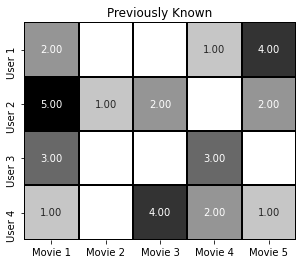

In [46]:
## shared plotting params
plot_kws = dict(annot=True, vmin=-1,cbar=False,fmt=".2f",
           square=True,linecolor='k',lw=1)
ax = sns.heatmap(R_df,cmap='Greys',**plot_kws)
ax.set_title('Previously Known')

What about that `np.nan` in the third row, last column? How will that item be reviewed by that user?

In [47]:
## to Get the Unknown Ratings, we take the dot product of P and QT
R_df

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
User 1,2.0,NaN,NaN,1.0,4.0
User 2,5.0,1.0,2.0,NaN,2.0
User 3,3.0,NaN,NaN,3.0,NaN
User 4,1.0,NaN,4.0,2.0,1.0


### Let's get the whole matrix!

In [48]:
P.dot(Q.T)

array([[ 1.99717984, -0.10339773,  3.80157388,  1.00522135,  3.96947118],
       [ 4.95987359,  0.99772807,  1.9994742 ,  3.08017572,  1.99887552],
       [ 3.00799117,  0.38437256,  4.30166793,  2.96747131,  1.94010313],
       [ 0.99340337, -0.02806164,  3.96943336,  2.00841398,  1.01228247]])

In [49]:
R_hat = P_df.dot(Q_df.T).round(2)
R_hat

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
User 1,2.00,-0.10,3.80,1.01,3.97
User 2,4.96,1.00,2.00,3.08,2.00
User 3,3.01,0.38,4.30,2.97,1.94
User 4,0.99,-0.03,3.97,2.01,1.01


Text(0.5, 1.0, 'Predicted Values')

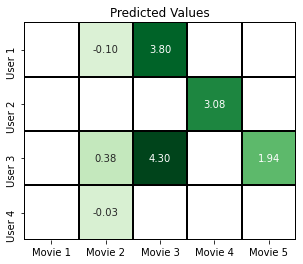

In [50]:
## visualizing predicted previouslty unknown ratings
unknowns = R_df.isna().values
ax = sns.heatmap(R_hat, mask=~unknowns,
            cmap='Greens',**plot_kws)
ax.set_title('Predicted Values')

<AxesSubplot:>

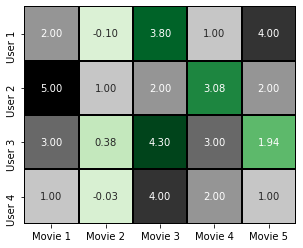

In [51]:
## Visualizing together 
ax = sns.heatmap(R_df,cmap='Greys',**plot_kws)
sns.heatmap(R_hat, mask=~unknowns,
            cmap='Greens',ax=ax,**plot_kws)

## But how do we actually figure out the P and Q matrices we used to calculate these ratings?

- There are several different matrix factorization algorithms for decomposing R into P and Q. 
    - "Matrix factorization" == "matrix decomposition"
        - Identify matrices that can be multiplied together to create the original matrix. 
        
        
        
- Singular Value Decomposition (SVD) [`surprise`]:
    - Very similar to PCA.
    
    <img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-collaborative-filtering-singular-value-decomposition/master/images/auevt.png" width=50%>
    
- In this example, $A$ as the __utility matrix__ with users and movie ratings. 

- After the decomposition:
    - $U$ will be the __user features__ matrix, 
    - $Σ$ will be the diagonal matrix of singular values (essentially __weights__),
    - $V.T$ will be the __movie features__ matrix. 



- $U$ and $V.T$ are orthogonal, and represent different things. 
    - $U$ represents how much users like each feature and 
    - $V.T$ represents how relevant each feature is to each movie.

---
    
    
- Alternating Least Squares [`PySpark`]

### Using SVD on our `R` matrix

In [52]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

# Create a sparse matrix 
A = csc_matrix(R_df.values, dtype=float)
A

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [53]:
# Apply SVD
n_features = 3
u, s, vt = svds(A, k=n_features) # k is the number of features to return

print ('A:\n', A.toarray())
print ('=')
print ('\nU:\n', u)
print ('\nΣ:\n', s)
print ('\nV.T:\n', vt)

u.shape

A:
 [[ 2. nan nan  1.  4.]
 [ 5.  1.  2. nan  2.]
 [ 3. nan nan  3. nan]
 [ 1. nan  4.  2.  1.]]
=

U:
 [[ 0.21031048  0.87093238 -0.12768845]
 [-0.28681297  0.4792179   0.0353684 ]
 [-0.32951503 -0.0736444  -0.94075306]
 [ 0.87460143 -0.08002186 -0.31213525]]

Σ:
 [0. 0. 0.]

V.T:
 [[-0.93827784  0.29572308  0.1770945  -0.02391855 -0.01574764]
 [-0.19347538 -0.63408191  0.14955647  0.68566883  0.26076526]
 [-0.22719199 -0.14235984 -0.9628568   0.00211516  0.03193413]]


(4, 3)

In [54]:
## Use is the users x factors matrix
factor_names = [f"Factor {i}" for i in range(1, n_features+1)]
u_df = pd.DataFrame(u,index=user_names,columns=factor_names)
u_df

,Factor 1,Factor 2,Factor 3
User 1,0.210310,0.870932,-0.127688
User 2,-0.286813,0.479218,0.035368
User 3,-0.329515,-0.073644,-0.940753
User 4,0.874601,-0.080022,-0.312135


In [55]:
## Vt is is the movies x factors matrix
vt_df = pd.DataFrame(vt,index=factor_names, columns=item_names)
vt_df.T

,Factor 1,Factor 2,Factor 3
Movie 1,-0.938278,-0.193475,-0.227192
Movie 2,0.295723,-0.634082,-0.142360
Movie 3,0.177094,0.149556,-0.962857
Movie 4,-0.023919,0.685669,0.002115
Movie 5,-0.015748,0.260765,0.031934


In [59]:
R_hat_svd = u_df.dot(vt_df)
R_hat_svd

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
User 1,-0.336824,-0.471871,0.290444,0.591871,0.219719
User 2,0.168358,-0.393716,-0.013178,0.335520,0.130609
User 3,0.537157,0.083177,0.836441,-0.044604,-0.044057
User 4,-0.734222,0.353816,0.443461,-0.076448,-0.044608


In [61]:
R_hat

,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
User 1,2.00,-0.10,3.80,1.01,3.97
User 2,4.96,1.00,2.00,3.08,2.00
User 3,3.01,0.38,4.30,2.97,1.94
User 4,0.99,-0.03,3.97,2.01,1.01


In [60]:
print('Approximation of Ratings Matrix')
R_hat_svd = u_df.dot(np.diag(s).dot(vt_df))
R_hat_svd.columns = item_names
R_hat_svd

Approximation of Ratings Matrix


,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5
User 1,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.0,0.0,0.0,0.0


In [40]:
item_names

['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5']

In [25]:
R_df.shape

(4, 5)

# Orig Continued

### Look at those results

Are they _exactly_ correct?
![check](../img/check.gif)

## ALS benefit: Loss Function

The Loss function $L$ can be calculated as:

$$ L = \sum_{u,i ∈ \kappa}(r_{u,i}− q_i^T p_u)^2 + λ( ||q_i||^2 + |p_u||^2)$$

Where $\kappa$ is the set of (u,i) pairs for which $r_{u,i}$ is known.

To avoid overfitting, the loss function also includes a regularization parameter $\lambda$. We will choose a $\lambda$ to minimize the square of the difference between all ratings in our dataset $R$ and our predictions.

There's the **least squares** part of ALS, got it!

## So now we use gradient decent, right?

![incorrect](../img/incorrect.gif)

### Here comes the alternating part

ALS alternates between holding the $q_i$'s constant and the $p_u$'s constant. 

While all $q_i$'s are held constant, each $p_u$ is computed by solving the least squared problem.<br>
After that process has taken place, all the $p_u$'s are held constant while the $q_i$'s are altered to solve the least squares problem, again, each independently.<br> 
This process repeats many times until you've reached convergence (ideally).

### Changing Loss function:

First let's assume first the item vectors are fixed, we first solve for the user vectors:

$$p_u=(\sum{r{u,i}\in r_{u*}}{q_iq_i^T + \lambda I_k})^{-1}\sum_{r_{u,i}\in r_{u*}}{r_{ui}{q_{i}}}$$
Then we hold the user vectors constant and solve for the item vectors

$$q_i=(\sum{r{u,i}\in r_{i*}}{p_up_u^T + \lambda I_k})^{-1}\sum_{r_{u,i}\in r_{u*}}{r_{ui}{p_{u}}}$$
This process repeats until convergence

## Activity:  Building a Recommendation System in PySpark - Lab

### Now onto the lab...
- [On DataBricks](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/147861797736682/131150906096110/3522390047483852/latest.html)

# Activity: Recommendation Systems with `Surprise`

## Using `surprise`

See the documentation [here](https://surprise.readthedocs.io/en/stable/getting_started.html)!

In [13]:
import surprise
from surprise.prediction_algorithms import *
import pandas as pd
import numpy as np
import datetime as dt

### Agenda

SWBAT:

- use the `surprise` package to build recommendation engines.

In [14]:
data = surprise.Dataset.load_builtin('ml-100k')

Now that we've downloaded the data, we can find it in a hidden directory:

In [15]:
df = pd.read_csv('~/.surprise_data/ml-100k/ml-100k/u.data',
            sep='\t', header=None)
df = df.rename(columns={0: 'user', 1: 'item', 2: 'rating', 3: 'timestamp'})
df

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## Data Exploration

In [16]:
df['user'].nunique()

943

In [17]:
df['item'].nunique()

1682

In [18]:
stats = df[['rating', 'timestamp']].describe()
stats

,rating,timestamp
count,100000.000000,1.000000e+05
mean,3.529860,8.835289e+08
std,1.125674,5.343856e+06
min,1.000000,8.747247e+08
25%,3.000000,8.794487e+08
50%,4.000000,8.828269e+08
75%,4.000000,8.882600e+08
max,5.000000,8.932866e+08


In [19]:
print(dt.datetime.fromtimestamp(stats.loc['min', 'timestamp']))
print(dt.datetime.fromtimestamp(stats.loc['max', 'timestamp']))

1997-09-19 23:05:10
1998-04-22 19:10:38


In [20]:
read = surprise.Reader('ml-100k')

In [21]:
read.rating_scale

(1, 5)

## Modeling

In [22]:
train, test = surprise.model_selection.train_test_split(data, random_state=42)

In [23]:
model_knn = KNNBasic().fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [24]:
model_svd = SVD().fit(train)

In [25]:
model_nmf = NMF().fit(train)

In [26]:
model_knn.get_neighbors(iid=51, k=1)

[65]

In [27]:
conds = [df['item'] == 51, df['item'] == 65]
choices = 2*[True]

df.loc[np.select(conds, choices, default=False)].sort_values('user')

,user,item,rating,timestamp
17220,1,65,4,875072125
7180,1,51,4,878543275
34873,7,51,2,891352984
19068,11,51,4,891906439
20877,13,51,3,882399419
...,...,...,...,...
69366,916,65,3,880845327
71730,916,51,2,880845658
90292,922,51,4,891448451
83681,934,65,4,891192914


## Evaluation

In [28]:
model_knn.test(test)

[Prediction(uid='907', iid='143', r_ui=5.0, est=4.039960584359155, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.017925064716712, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.7671897065953712, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=4.196945437050507, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.3353958388714653, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='363', iid='1512', r_ui=1.0, est=4.463116702100285, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='193', iid='487', r_ui=5.0, est=3.959646386658832, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='808', iid='313', r_ui=5.0, est=4.482811176968667, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='557', iid='682', r_ui=2.0, est

In [29]:
results = {}
results['knn'] = {'mae':surprise.accuracy.mae(model_knn.test(test)),
                  'rmse':surprise.accuracy.rmse(model_knn.test(test))}

MAE:  0.7727
RMSE: 0.9802


In [30]:
results['svd'] = {'mae':surprise.accuracy.mae(model_svd.test(test)),
                  'rmse':surprise.accuracy.rmse(model_svd.test(test))}

MAE:  0.7385
RMSE: 0.9373


In [31]:
results['nmf'] = {'mae':surprise.accuracy.mae(model_nmf.test(test)),
                  'rmse':surprise.accuracy.rmse(model_nmf.test(test))}

MAE:  0.7591
RMSE: 0.9643


In [32]:
import pandas as pd
pd.DataFrame(results).T.style.background_gradient().format('{:.2f}')

,mae,rmse
knn,0.77,0.98
svd,0.74,0.94
nmf,0.76,0.96
